# ИССЛЕДОВАНИЕ НАДЕЖНОСТИ ЗАЕМЩИКОВ

**Заказчик**: кредитный отдел банка. 

**Исходные данные**: статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Нужно выяснить, есть ли:
- зависимость между наличием детей и возвратом кредита в срок?
- зависимость между семейным положением и возвратом кредита в срок?
- зависимость между уровнем дохода и возвратом кредита в срок?
- как разные цели кредита влияют на его возврат в срок?

Перед началом анализа мы проверим: 
- есть ли пропуски в данных и проработаем их, 
- проверим типы данных и при необходимость изменим их, 
- проверим наличие дубликатов и проработаем их,
- категоризируем данные, если это необходимо
- приступим к самому анализу взаимосвязей


Расшифровка названий столбцов:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-и-заполнение-пропущенных-значений" data-toc-modified-id="Поиск-и-заполнение-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск и заполнение пропущенных значений</a></span></li><li><span><a href="#Работа-с-типами-данных" data-toc-modified-id="Работа-с-типами-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с типами данных</a></span></li><li><span><a href="#Поиск-и-удаление-дубликатов" data-toc-modified-id="Поиск-и-удаление-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск и удаление дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Исследование" data-toc-modified-id="Исследование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Обзор данных

Для начала мы импортировали библиотеки `Pandas`, `Seaborn` и `Matplotlib.pyplot`, функцию `Mystem` из библиотеки `Pymystem3`, функцию `Counter` из библиотеки `Collections` и функцию `display` из библиотеки `IPython.display`.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pymystem3 import Mystem
m = Mystem()

from collections import Counter
from IPython.display import display

#не отображает предупреждения
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

Cоздали DataFrame `customer` и с помощью функции `info()` посмотрели общую информацию о исходных данных.

In [2]:
customer = pd.read_csv('data.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Из общей информации видно, что исходные данные содержат 12 столбцов и 21525 строк. Используются как числовой тип данных: float и int, так и строковый - object. В двух столбцах есть пропуски - `days_employed` (общий трудовой стаж в днях) и `total_income` (ежемесячный доход), оба имеют тип данных `float`. 
Все названия столбцов корректные, заменили только название столбца "возраст клиента в годах" `dob_years` на более удобное `age`.
После ознакомления с общей информацией, вывели первые 15 строк таблицы с помощью функции `head()`.

In [3]:
customer.set_axis(['children','days_employed','age','education', 'education_id',
                  'family_status','family_status_id','gender','income_type','debt',
                  'total_income','purpose'], axis='columns', inplace=True)
display(customer.head(15))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Уже по первым 15 строкам видим пропуски `NaN` в двух столбцах: days_employed и total_income. Также в столбце общий трудовой стаж в днях `days_employed` кроме пропусков, есть отрицательные значения. В столбце образование `education` данные указаны в разных регистрах. А в столбце `purpose` встречается описание одной цели кредита разными способами, например: покупка жилья, покупка жилья для семьи, покупка жилой недвижимости. Следующим шагом осуществили предобработку данных.

## Предобработка данных

### Поиск и заполнение пропущенных значений 

Для начала с помощью функции `isnull` и `sum` проверили количество пропусков по столбцам.

In [4]:
print(customer.isnull().sum())

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Получили, что пропуски есть только в столбцах с трудовым стажем `days_employed` и ежемесячным доходом `total_income`, причем в равном количестве - 2174.
Далее проверили, находятся ли эти пропуски в одних и тех же строка.

In [5]:
#создание выборки с пропусками в customer_null и проверка,
#сколько всего строк попало в выборку, и нулевые значения по столбцам
customer_null = customer[customer['days_employed'].isnull()]
print('Количество строк в выборке с пропусками ',len(customer_null))
print('')
print(customer_null.isnull().sum())



Количество строк в выборке с пропусками  2174

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Получили, что пропущенные значения в одинаковых строках. 
Вывели первые 10 строк выборки с нулевыми значениями.

In [6]:
display(customer_null.head(10))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


На основании выборки приняли решение посмотреть общее количество и количество пропусков по категориям типа занятости - `income_type`.

In [7]:
(
    customer
    .groupby('income_type')['income_type','total_income']
    .count()
    .rename(columns={'income_type':'count_all','total_income':'count_without_nan'})
    .assign(
          #количество пропусков
          diff = lambda x: x['count_all']- x['count_without_nan'],
          #доля пропусков
          part = lambda x: x['diff']/x['count_all']
    ) 
)

,count_all,count_without_nan,diff,part
income_type,,,,
безработный,2,2,0,0.000000
в декрете,1,1,0,0.000000
госслужащий,1459,1312,147,0.100754
компаньон,5085,4577,508,0.099902
пенсионер,3856,3443,413,0.107106
предприниматель,2,1,1,0.500000
сотрудник,11119,10014,1105,0.099379
студент,1,1,0,0.000000


Получили, что доля пропусков, присутствующих в типах занятости: госслужащий, компаньон, пенсионер и сотрудник, составляет 10%. Для данных типов занятости найдем среднее значение по группе и заполним пропуски.
Что касается типа занятости 'предприниматель', то в нем присутствует всего 2 клиента, из которых данные по одному клиенту отсутствуют. Данный пропуск некорректно заполнять усредненной цифрой, поэтому данную строку удалим.
Для начала вывели данные по предпринимателям, а после удалили строку и проверили.

In [8]:
display(customer[customer['income_type'] == 'предприниматель'])

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости
18697,0,-520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы


In [9]:
#вывод общего числа строк до удаления
print('Количество строк до удаления: ',len(customer))

#удаление строки с пропуском в типе занятости "предприниматель" и проверка.
customer.drop(customer[(customer.income_type == 'предприниматель') \
                       & (customer.days_employed.isnull())].index, inplace=True)

#вывод общего числа строк после удаления и количество клиентов по типу занятости
print('Количество строк после удаления',len(customer))
print('')
print(customer['income_type'].value_counts())


Количество строк до удаления:  21525
Количество строк после удаления 21524

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        1
студент                1
в декрете              1
Name: income_type, dtype: int64


Пропущенные значения по остальным типам занятости заменим на средние в каждой категории.
Как мы уже ранее видели в столбцах со стажем есть отрицательные значение. Возможно, это ошибка при выгрузке. Поэтому перед тем, как заменять пропуски на средние значения, данные этого столбца взяли по модулю и проверили, выведя первые 5 строк, в которых были минусовые значения.

In [10]:
customer['days_employed'] = abs(customer['days_employed'])
display(customer.head())

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Далее нашли средние показатели по категориям клиентов. Для трудового стажа в днях в качестве среднего использовали среднее арифмитеческое значение - функция `mean`, так как данные такого типа имеют ограниченный диапазон значений. А в качестве среднего показателя ежемесячного дохода использовали медиану `median`, так как в данной выборке могут быть сильно выделяющиеся значения, которые повлияют на итоговый результат.

In [11]:
#находит средние показатели трудового стажа и медиану ежемесячного дохода 
#по категории клиентов "госслужащие"
jobholder_days_employed_avg = customer[customer['income_type'] == 'госслужащий']['days_employed'].mean()
jobholder_total_income_avg = customer[customer['income_type'] == 'госслужащий']['total_income'].median()


#находит средние показатели трудового стажа и медиану ежемесячного дохода 
#по категории клиентов "компаньон"
partner_days_employed_avg = customer[customer['income_type'] == 'компаньон']['days_employed'].mean()
partner_total_income_avg = customer[customer['income_type'] == 'компаньон']['total_income'].median()


#находит средние показатели трудового стажа и медиану ежемесячного дохода 
#по категории клиентов "пенсионер"
retiree_days_employed_avg = customer[customer['income_type'] == 'пенсионер']['days_employed'].mean()
retiree_total_income_avg = customer[customer['income_type'] == 'пенсионер']['total_income'].median()


#находит средние показатели трудового стажа и медиану ежемесячного дохода 
#по категории клиентов "сотрудник"
employee_days_employed_avg = customer[customer['income_type'] == 'сотрудник']['days_employed'].mean()
employee_total_income_avg = customer[customer['income_type'] == 'сотрудник']['total_income'].median()

Следующим шагом заменили пропуски на средние значения.

In [12]:
#замена пропусков в типе занятости "госслужащие"

customer.loc[customer['income_type'] == 'госслужащий', 'days_employed'] = customer[customer['income_type'] == 'госслужащий']['days_employed'].fillna(jobholder_days_employed_avg)
customer.loc[customer['income_type'] == 'госслужащий', 'total_income'] = customer[customer['income_type'] == 'госслужащий']['total_income'].fillna(jobholder_total_income_avg)

#замена пропусков в типе занятости "компаньон"

customer.loc[customer['income_type'] == 'компаньон', 'days_employed'] = customer[customer['income_type'] == 'компаньон']['days_employed'].fillna(partner_days_employed_avg)
customer.loc[customer['income_type'] == 'компаньон', 'total_income'] = customer[customer['income_type'] == 'компаньон']['total_income'].fillna(partner_total_income_avg)

#замена пропусков в типе занятости "пенсионер"

customer.loc[customer['income_type'] == 'пенсионер', 'days_employed'] = customer[customer['income_type'] == 'пенсионер']['days_employed'].fillna(retiree_days_employed_avg)
customer.loc[customer['income_type'] == 'пенсионер', 'total_income'] = customer[customer['income_type'] == 'пенсионер']['total_income'].fillna(retiree_total_income_avg)

#замена пропусков в типе занятости "сотрудник"

customer.loc[customer['income_type'] == 'сотрудник', 'days_employed'] = customer[customer['income_type'] == 'сотрудник']['days_employed'].fillna(employee_days_employed_avg)
customer.loc[customer['income_type'] == 'сотрудник', 'total_income'] = customer[customer['income_type'] == 'сотрудник']['total_income'].fillna(employee_total_income_avg)

#выводит на экран информацию о наличии пропусках в таблице "customer"
print(customer.isnull().sum())

children            0
days_employed       0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Замена прошла успешно.

Промежуточные рузультаты.
Мы выявили пропуски в двух столбцах: "общий трудовой стаж в днях" и "ежемесячный доход". Посмотрели, для каких типов занятости свойственны пропуски. Пропуски выявлены у пенсионеров, госслужащих, сотрудников, компаньонов и предпринимателей. Во всех группах, за исключением предпринимателей, доля пропусков составила 10 и менее процентов. По ним пропуски заменили на средние значения в типе занятости. Предпринимателей в данных было всего двое и у одного из них присутствовали пропуски. Заменять значение на среднее не корректно, в связи с чем приняли решение удалить данный пропуск.

### Работа с типами данных

Следующим шагом перешли к проверке и, при необходимости, изменению типа данных.
Посмотрели еще раз на общую информацию.

In [13]:
customer.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  float64
 2   age               21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.8 MB


В наших данных 2 столбца типа `float64`, 5 столбцов типа `int64` и 5 столбцов типа `object`. 
Занимаемая память таблицей `customer` - 11.8 МВ. 
Посмотрели сколько памяти в среднем занимает конкретный тип в таблице `customer`.

In [14]:
def memory_usage_type(customer):
    #Функция memory_usage_type принимает на вход DataFrame, отбирает стобцы заданного типа
    #данных: float, int и object. 
    #Далее определяет по каждому типу данных среднее потребление памяти, 
    #переводит в МВ и выводит на экран.
    
    for dtype in ['float','int','object']:
        selected_dtype = customer.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Среднее потребление памяти столбцами типа {}: {:03.2f} MB".format(dtype,mean_usage_mb))
        
memory_usage_type(customer)

Среднее потребление памяти столбцами типа float: 0.16 MB
Среднее потребление памяти столбцами типа int: 0.16 MB
Среднее потребление памяти столбцами типа object: 1.78 MB


Среднее потребление типами float и int одинаковое - 0.16 МВ. Больше всего памяти занимают столбцы типа object - 1.78 МВ. С них и начали работу по изменению типов данных.

К ним относятся столбцы `education`, `family_status`, `gender`, `income_type` и `purpose`. Чтобы уменьшить потребление памяти, необходимо перевести тип `object` в тип `category`, но данный тип мы не можем использовать для всех строковых значений. Если посмотреть еще раз на структуру данных, то для значений "семейное положение `family_status` у нас уже есть идентификатор `family_status_id`. В этом случае гораздо логичнее выделить их в новый словарь не изменяя тип данных, что мы сделали на этапе "2.5 Категоризации данных". 
Рассмотрели какое количество уникальных значений содержится в оставшихся колонках.

In [15]:
#Выводит общее количество строк
print('Общее количество строк: ', len(customer))

#Присваивает массиву данных customer_object названия необходимых столбцов.
#Для каждого анализируемого столбца подсчитывает количество уникальных значений и выводит
#их на экран
customer_object = ['education','gender','income_type','purpose']
for column in customer_object:
    column_unique = customer[column].unique()
    print("Количество уникальных значений в столбце {}: {}".format(column,len(column_unique)))

Общее количество строк:  21524
Количество уникальных значений в столбце education: 15
Количество уникальных значений в столбце gender: 3
Количество уникальных значений в столбце income_type: 8
Количество уникальных значений в столбце purpose: 38


В данных `education`, `gender` и`income_type` содержится небольшое число определенные уникальные категории. Для них мы можем использовать тип `category`.
А вот тип данных столбца `purpose` оставим `object`. Хотя он также имеет всего 38 уникальных значений, но они не имеют определенную категоризацию. Для приведения их в дальнейшем к единым категориям удобнее будет использовать строковый тип данных.
Посмотрели, как изменилось потребление памяти.

In [16]:
#изменение типа данных с `object` на 'category'
customer['education'] = customer['education'].astype('category')
customer['gender'] = customer['gender'].astype('category')
customer['income_type'] = customer['income_type'].astype('category')

memory_usage_type(customer)

Среднее потребление памяти столбцами типа float: 0.16 MB
Среднее потребление памяти столбцами типа int: 0.16 MB
Среднее потребление памяти столбцами типа object: 1.99 MB


In [17]:
customer.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  int64   
 1   days_employed     21524 non-null  float64 
 2   age               21524 non-null  int64   
 3   education         21524 non-null  category
 4   education_id      21524 non-null  int64   
 5   family_status     21524 non-null  object  
 6   family_status_id  21524 non-null  int64   
 7   gender            21524 non-null  category
 8   income_type       21524 non-null  category
 9   debt              21524 non-null  int64   
 10  total_income      21524 non-null  float64 
 11  purpose           21524 non-null  object  
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 7.2 MB


Хотя среднее потребление памяти столбцами типа `object` увеличилось с 1.78 до 1.99 МВ (связано с уменьшением количества столбцов и тем, что в типах `object` остался самый "тяжелый" столбец `purpose`), общее потребление памяти снизилось на 40% с 11.8 до 7.2 МВ.

Далее перешли к столбцам типа данных float64: "общий трудовой стаж в днях" и "ежемесячный доход".
Мы рассмотрели минимальное, среднее и максимальное значение общего трудового стажа в днях и перевели его в года.

In [18]:
#Минимальный стаж в годах в столбце days_employed
year_empl_min = customer['days_employed'].min()/365
print('Минимальный стаж в годах: {:.0f} лет'.format(year_empl_min))

#Средний стаж в годах в столбце days_employed
year_empl_avg = customer['days_employed'].mean()/365
print('Средний стаж в годах: {:.0f} лет'.format(year_empl_avg))

#Максимальный стаж в годах в столбце days_employed
year_empl_max = customer['days_employed'].max()/365
print('Максимальный стаж в годах: {:.0f} лет'.format(year_empl_max))

Минимальный стаж в годах: 0 лет
Средний стаж в годах: 185 лет
Максимальный стаж в годах: 1101 лет


На основании данных результатов видно, что либо в данных есть ошибка, либо использована какая-то специфическая система учета стажа. Для реализации целей нашего анализа информация о трудовом стаже клиентов не обязательна, поэтому данные значения оставили без изменения типа данных.

Что же касается ежемесячного дохода, то он необходим для нашего анализа, но точность до запятых нам не нужна. В связи с этим воспользовались методом `astype` и перевели данные из вещественного типа в целочисленное.

In [19]:
#Изменяет для каждого значения в столбце 'total_income' тип данных с float на int.
customer['total_income'] = customer['total_income'].astype('int')

Проверили минимальное и максимальное значения ежемесячного дохода.

In [20]:
#Минимальный ежемесяный доход total_income
income_min = customer['total_income'].min()
print('Минимальный ежемесяный доход: ', income_min)

#Максимальный ежемесяный доход total_income
income_max = customer['total_income'].max()
print('Максимальный ежемесяный доход: ', income_max)

Минимальный ежемесяный доход:  20667
Максимальный ежемесяный доход:  2265604


Проверили изменение типа данных с помощью функции `info`. Изменение произошло успешно.

In [21]:
memory_usage_type(customer)

Среднее потребление памяти столбцами типа float: 0.16 MB
Среднее потребление памяти столбцами типа int: 0.16 MB
Среднее потребление памяти столбцами типа object: 1.99 MB


In [22]:
customer.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  int64   
 1   days_employed     21524 non-null  float64 
 2   age               21524 non-null  int64   
 3   education         21524 non-null  category
 4   education_id      21524 non-null  int64   
 5   family_status     21524 non-null  object  
 6   family_status_id  21524 non-null  int64   
 7   gender            21524 non-null  category
 8   income_type       21524 non-null  category
 9   debt              21524 non-null  int64   
 10  total_income      21524 non-null  int64   
 11  purpose           21524 non-null  object  
dtypes: category(3), float64(1), int64(6), object(2)
memory usage: 7.2 MB


Данное изменение не повлияло на потреблении памяти, но упростило дальнейшую работу по анализу значениями ежемесячного дохода.

Осталось рассмотреть тип данных `int`. Вывели минимальное и максимальное значение для каждого столбца.

In [23]:
#Присваивает массиву данных customer_int названия необходимых столбцов.
#Для каждого анализируемого столбца выводит минимальное и максимальное значение на экран
customer_int = ['children','age','education_id','family_status_id','debt']
for column in customer_int:
    column_max = customer[column].max()
    column_min = customer[column].min()
    print("Столбец {}: минимальное значение {},максимальное {}".format(column,
                                                                       column_min,
                                                                       column_max))

Столбец children: минимальное значение -1,максимальное 20
Столбец age: минимальное значение 0,максимальное 75
Столбец education_id: минимальное значение 0,максимальное 4
Столбец family_status_id: минимальное значение 0,максимальное 4
Столбец debt: минимальное значение 0,максимальное 1


Все значения данных столбцов имеют ограниченное количество значений, поэтому мы изменили тип данных на `int8` с помощью функции `astype`.

In [24]:
#изменяет тип данных на 'int8'
customer['children'] = customer['children'].astype('int8')
customer['age'] = customer['age'].astype('int8')
customer['education_id'] = customer['education_id'].astype('int8')
customer['family_status_id'] = customer['family_status_id'].astype('int8')
customer['debt'] = customer['debt'].astype('int8')

Проверили как изменилось потребление память после всех изменений.

In [25]:
memory_usage_type(customer)

Среднее потребление памяти столбцами типа float: 0.16 MB
Среднее потребление памяти столбцами типа int: 0.16 MB
Среднее потребление памяти столбцами типа object: 1.99 MB


In [26]:
customer.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21524 non-null  int8    
 1   days_employed     21524 non-null  float64 
 2   age               21524 non-null  int8    
 3   education         21524 non-null  category
 4   education_id      21524 non-null  int8    
 5   family_status     21524 non-null  object  
 6   family_status_id  21524 non-null  int8    
 7   gender            21524 non-null  category
 8   income_type       21524 non-null  category
 9   debt              21524 non-null  int8    
 10  total_income      21524 non-null  int64   
 11  purpose           21524 non-null  object  
dtypes: category(3), float64(1), int64(1), int8(5), object(2)
memory usage: 6.5 MB


Среднее потребление памяти столбцами типа `int` не изменилось, но потребление памяти снизилось с 7.2 до 6.5 МВ.

Промежуточные результаты.
С помощью метода `astype` изменили тип данных с `float` на `int` для значений "ежемесячный доход" `total_income`. Изменили тип данных с `object` на `category` для столбцов "образование" `education`, "пол" `gender` и "тип занятости" `income_type`.
Общее потребление памяти снизили  почти вдвое: с 11,8 МВ до 6,5 МВ.
Данные в столбце "трудовой стаж в днях" `days_employed` не корректны и для анализа использованы не будут, поэтому было принято решения оставить их без изменения.

### Поиск и удаление дубликатов

Начали проверку дубликатов с просмотра, как внесены строковые данные, есть ли разные регистры или разное написание в столбцах: образование `education`, семейное положение `family_status`, пол `gender`.
Сначала посмотрим данные в столбце образование `education`.
Столбец тип занятости `income_type` мы уже видели в предыдущем разделе, начилие дубликатов в нем не выявлено.

In [27]:
print(customer.groupby('education')['education'].count())

education
ВЫСШЕЕ                   274
Высшее                   268
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Начальное                 15
Неоконченное высшее       47
СРЕДНЕЕ                  772
Среднее                  711
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
высшее                  4717
начальное                250
неоконченное высшее      668
среднее                13750
ученая степень             4
Name: education, dtype: int64


По данным видно, что одни и те же значения указаны в разных регистрах.
Исправили это с помощью метода `str.lower()` и проверили.

In [28]:
customer['education'] = customer['education'].str.lower()
print(customer.groupby('education')['education'].count())

education
высшее                  5259
начальное                282
неоконченное высшее      744
среднее                15233
ученая степень             6
Name: education, dtype: int64


Привели данные по образованию к одному регистру и убрали дубли. Далее перешли к стобцу семейное положение.

In [29]:
print(customer.groupby('family_status')['family_status'].count())

family_status
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
гражданский брак          4177
женат / замужем          12379
Name: family_status, dtype: int64


Дублирование данных в данном столбце нет, но мы убрали верхний регистр в 'Не женат / не замужем'.

In [30]:
customer['family_status'] = customer['family_status'].str.lower()
print(customer.groupby('family_status')['family_status'].count())

family_status
в разводе                 1195
вдовец / вдова             960
гражданский брак          4177
женат / замужем          12379
не женат / не замужем     2813
Name: family_status, dtype: int64


Следующим рассмотрели столбец "пол".

In [31]:
print(customer.groupby('gender')['gender'].count())

gender
F      14236
M       7287
XNA        1
Name: gender, dtype: int64


Получили странное значение в гендере "XNA". Вывели данную строку для просмотра.

In [32]:
display(customer[customer['gender'] == 'XNA'])

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Данное значение можно отнести к артефакту. Возможно, в данных был пропуск и "XNA" - выбранный метод для заполнения таких пропусков. Так как это всего одна строка из 5085 строк, то ее удаление не повлияет на итоговый результат. Это будет самый оптимальный способ в данном случае.

In [33]:
customer.drop(customer[customer.gender == 'XNA'].index, inplace=True)
print(customer['gender'].value_counts())

F      14236
M       7287
XNA        0
Name: gender, dtype: int64


Данные по полу чистые, перешли к проверке дубликатов с помощью функций `duplicated` и `sum`.

In [34]:
print('Количество дупликатов', customer.duplicated().sum())

Количество дупликатов 71


In [35]:
#удаление дубликатов и проверка
customer = customer.drop_duplicates()
print('Количество дупликатов', customer.duplicated().sum())

Количество дупликатов 0


После чего проверили, какие значения хранятся в количественных данных:
- количество детей в семье `children`
- возраст клиента в годах `age`
- имел ли задолженность по возврату кредитов `debt`

In [36]:
#вывод сгруппировонных данных и их количество в столбце children
print(customer.groupby('children')['children'].count())

children
-1        47
 0     14089
 1      4808
 2      2052
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64


Встречаем артефакты - количество детей "-1" и "20". Возможно, это ошибки ввода и должны были быть значения "1" и "2", а может быть возникла ошибка при выгрузки. Мы не знаем причину наверняка и доля таких строк составляет всего 0,005%, поэтому корректнее всего удалить их.

In [37]:
customer.drop(customer[customer.children == -1].index, inplace=True)
customer.drop(customer[customer.children == 20].index, inplace=True)
print(customer.groupby('children')['children'].count())

children
0    14089
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


Следующим шагом проверили данные по возрасту клиентов

In [38]:
#вывод сгруппировонных данных и их количество в столбце age
print(customer.groupby('age')['age'].count())

age
0     100
19     14
20     51
21    110
22    183
23    250
24    262
25    356
26    406
27    490
28    501
29    542
30    533
31    555
32    505
33    577
34    595
35    613
36    552
37    530
38    594
39    571
40    601
41    601
42    591
43    509
44    541
45    493
46    466
47    477
48    534
49    505
50    508
51    444
52    483
53    457
54    473
55    441
56    478
57    453
58    453
59    440
60    373
61    352
62    347
63    268
64    258
65    193
66    182
67    167
68     99
69     83
70     65
71     56
72     33
73      8
74      6
75      1
Name: age, dtype: int64


Снова встретили артефакт - нулевой возраст. Доля так же составляет 0,005%, корректнее удалить данные строки.

In [39]:
customer.drop(customer[customer.age == 0].index, inplace=True)
print(customer['age'].value_counts())

35    613
41    601
40    601
34    595
38    594
42    591
33    577
39    571
31    555
36    552
29    542
44    541
48    534
30    533
37    530
43    509
50    508
49    505
32    505
28    501
45    493
27    490
52    483
56    478
47    477
54    473
46    466
53    457
57    453
58    453
51    444
55    441
59    440
26    406
60    373
25    356
61    352
62    347
63    268
24    262
64    258
23    250
65    193
22    183
66    182
67    167
21    110
68     99
69     83
70     65
71     56
20     51
72     33
19     14
73      8
74      6
75      1
Name: age, dtype: int64


In [40]:
#вывод сгруппировонных данных и их количество в столбце debt
print(customer.groupby('debt')['debt'].count())

debt
0    19505
1     1724
Name: debt, dtype: int64


Данные в столбце "имел ли задолженность по возврату кредитов" корректны.

Промежуточный результат.
Мы проверили столбцы со строковым типом данных: "образование", "семейное положение" и "пол". Привели к единому регистру и удалили некорректные данные. После чего проверили количество дубликатов с помощью методов `duplicated` и `sum`, и удалили с помощью метода `drop_duplicates`.
Далее проверили данные в столбцах: "количество детей", "возраст клиента" и "имел ли клиент задолженность по возврату кредитов". Также удалили некорректные данные.
Осталось решить вопрос с последним столбцом строкового типа - цель кредита `purpose`.

### Лемматизация

С помощью функции `groupby` и `count` посмотрели, что же содержит в себе столбец "цель кредита - `purpose`".

In [41]:
print(customer.groupby('purpose')['purpose'].count())

purpose
автомобили                                474
автомобиль                                487
высшее образование                        443
дополнительное образование                453
жилье                                     635
заняться высшим образованием              493
заняться образованием                     407
на покупку автомобиля                     465
на покупку подержанного автомобиля        471
на покупку своего автомобиля              501
на проведение свадьбы                     759
недвижимость                              627
образование                               439
операции с жильем                         641
операции с коммерческой недвижимостью     643
операции с недвижимостью                  669
операции со своей недвижимостью           623
покупка жилой недвижимости                598
покупка жилья                             634
покупка жилья для сдачи                   647
покупка жилья для семьи                   636
покупка коммерческой недви

Заметили, что одна и таже цель описана по разному. Чтобы выделить основные цели получения кредита, объединили все уникальные значения в столбце `purpose` и вывели сколько раз в них повторяются отдельные слова.

In [42]:
#объединение всех уникальных значений 'purpose', 
#их лемматизация и передача функции Counter
purpose_uniq = ' '.join(customer['purpose'].unique())
purpose_lemm = m.lemmatize(purpose_uniq)
print(Counter(purpose_lemm))

Counter({' ': 96, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


Получили список слов, отсартированного по убыванию числа их повторений. Наиболее часто встречающиеся слова: "покупка", "недвижимость", "автомобиль", "образование", "жилье".  Мы выделили 6 целей получения кредита: покупка недвижимости, строительство недвижимости, ремонт, покупка автомобиля, свадьба и образование.

In [43]:
def purpose_net(row):
    #Функция purpose_net принимает на вход строку данных из DataFrame, лемматизирует значение
    #по столбцу 'purpose'. 
    #Далее осуществляет циклический поиск по полученной коллекции слов до первого совпадения
    #с наиболее вероятным вариантов и возвращает связанное с ним строковое значение.
    #Если поиск не дал результата, возвращается строковое значение 'ошибка'.
    
    text = row['purpose']
    lemmas = m.lemmatize(text)

    for word in lemmas:

        if 'автомобиль' in word:
            return 'покупка автомобиля'
        if 'образование' in word:
            return 'образование'
        if 'свадьба' in word:
            return 'свадьба'
        if 'ремонт' in word:
            return 'ремонт'
        if 'строительство' in word:
            return 'строительство недвижимости'
        if 'жилье' in word or 'недвижимость' in word:
            return 'покупка недвижимости'
    return 'ошибка'

#для каждой строки в DF customer отрабатывается функция purpose_net
#и возвращает значение в новый столбец purpose_net
customer['purpose_net'] = customer.apply(purpose_net, axis=1)

#проверка первых 10 строк DF customer
display(customer.head(10))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_net
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка недвижимости
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,покупка автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка недвижимости
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,покупка недвижимости
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,покупка недвижимости
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,покупка недвижимости


In [44]:
#проверка уникальных значений в новом столбце 'purpose_net' и их количества
print(customer.groupby('purpose_net')['purpose'].count())

purpose_net
образование                   3970
покупка автомобиля            4258
покупка недвижимости          8238
ремонт                         602
свадьба                       2299
строительство недвижимости    1862
Name: purpose, dtype: int64


Уникальные значения в столбце `purpose_net` соответствуют выделенным 6 целям кредита. Значение "ошибка" отсутствует. Выделение основных целей кредита прошла успешно. 

Промежуточные результаты.
Мы объединили все уникальные значения в столбце `purpose`, лемматизировали их и с помощью функции `Counter` посчитали, сколько повторений у каждого отдельного слова.
Выделили 6 основных целей получения кредита. Написали функцию, которая для каждой строки данных по столбцу `purpose` присваивает одну из 6 выделенных целей кредита и добавляет ее в столбец `purpose_net`.

### Категоризация данных

Для ответа на вопросы исследования нам необходим анализ следующих данных: наличие детей, семейное положение, уровень дохода, цель кредита и наличие задолженности по кредиту. 
Ранее мы уже обработали данные в столбце "цель кредита". Нам необходимо оценить, нужна ли дополнительная категоризация оставшихся данных.
Для начала еще раз вывели общую информацию.

In [45]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21229 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21229 non-null  int8    
 1   days_employed     21229 non-null  float64 
 2   age               21229 non-null  int8    
 3   education         21229 non-null  object  
 4   education_id      21229 non-null  int8    
 5   family_status     21229 non-null  object  
 6   family_status_id  21229 non-null  int8    
 7   gender            21229 non-null  category
 8   income_type       21229 non-null  category
 9   debt              21229 non-null  int8    
 10  total_income      21229 non-null  int64   
 11  purpose           21229 non-null  object  
 12  purpose_net       21229 non-null  object  
dtypes: category(2), float64(1), int64(1), int8(5), object(4)
memory usage: 1.3+ MB


Столбец `children` не требует каких-либо дополнительных действий и подходит для анализа.
Что касается семейного положения, то в общих данных видим категорию и ее номер. Выделили словарь `family_dict` и удалили дубликаты методом `drop_duplicates`.

In [46]:
#создаем словарь family_dict и удаляем дубликаты
family_dict = customer[['family_status_id','family_status']]
family_dict = family_dict.drop_duplicates().reset_index(drop=True)

display(family_dict)

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Ежемесячный доход требует категоризации. Для начала вывели минимальный, максимальный доход и медиану.

In [47]:
#Минимальный ежемесяный доход total_income
print('Минимальный ежемесяный доход: ', customer['total_income'].min())

#Медиана ежемесяного дохода total_income
income_median = customer['total_income'].median()
print('Медиана ежемесяного дохода: {:.0f}'.format(income_median))

#Максимальный ежемесяный доход total_income
print('Максимальный ежемесяный доход: ', customer['total_income'].max())

Минимальный ежемесяный доход:  20667
Медиана ежемесяного дохода: 142594
Максимальный ежемесяный доход:  2265604


Разбег ежемесячного дохода составляет более 2,2 миллионов. Посмотрели данное распределение графически с помощью метода `distplot`.

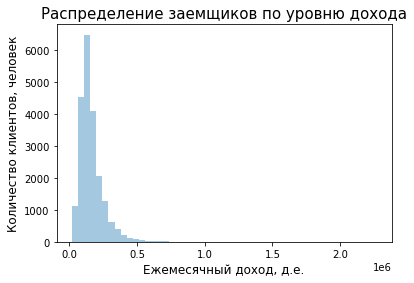

In [48]:
#выводит график
sns.distplot(customer['total_income'], hist=True, kde=False, rug=False )

#Добавляет название заголовка и осей
plt.title('Распределение заемщиков по уровню дохода', fontsize=15)
plt.xlabel('Ежемесячный доход, д.е.', fontsize=12)
plt.ylabel('Количество клиентов, человек', fontsize=12)
plt.show()

Из графика видно, что основная масса значений находится в диапазоне до 500000. Вывели данные значения графически.

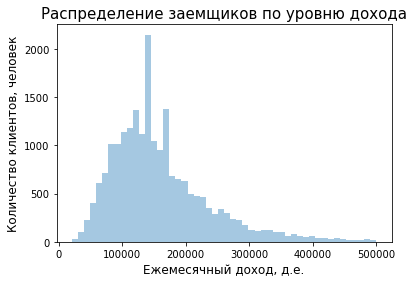

In [49]:
#выводит график
sns.distplot(customer[customer['total_income'] <500000]['total_income'], 
             hist=True, kde=False, rug=False )

#Добавляет название заголовка и осей
plt.title('Распределение заемщиков по уровню дохода', fontsize=15)
plt.xlabel('Ежемесячный доход, д.е.', fontsize=12)
plt.ylabel('Количество клиентов, человек', fontsize=12)
plt.show()

Исходя из распределения значений создали три категории ежемесячного дохода: 
"низкий" - до 100000 включительно, "средний" - от 100000 до 180000 включительно и "высокий" - свыше 180000.

In [50]:
def total_income_group(row):
    #Возвращает категорию по доходу, используя правила:
    # -'низкий' при значении income менее 100000 включительно
    # -'средний' при значениии income более 100000 и менее 180000, включая 180000
    # -'высокий' во всех остальных случаях

    income = row['total_income']
    if income <= 100000:
        return 'низкий'
    elif income > 100000 and income <= 180000:
        return 'средний'
    else:
        return 'высокий'

#присваивает категорию по ежемесячному доходу
#и возвращает значение в новый столбец 'total_income_group'
customer['total_income_group'] = customer.apply(total_income_group, axis=1)

#выводит на проверку первые 10 строк со значениями total_income, total_income_group
display(customer[['total_income','total_income_group']].head(10))

,total_income,total_income_group
0,253875,высокий
1,112080,средний
2,145885,средний
3,267628,высокий
4,158616,средний
5,255763,высокий
6,240525,высокий
7,135823,средний
8,95856,низкий
9,144425,средний


Промежуточные результаты.
Для данных "семейного положения" создали словарь `family_dict`. 
Провели категоризацию "ежемесячного дохода" по следующим правилам: "низкий" - до 100000 включительно, "средний" - от 100000 до 180000 включительно и "высокий" - свыше 180000.

## Исследование 

Предобработка данных завершена, приступили непосредственно к исследованию. Перед нами стоит четыре задачи:
- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

В качестве метрики для оценки данных задач использовали `percentage_debt` - отношение количества клиентов с задолженность внутри категории к общему количеству количеству клиентов данной категории.

Метод расчета следующих показателей одинаковый для всего анализа:
- "percentage_debt" - отношение количества клиентов с задолженность внутри категории к общему количеству количеству клиентов данной категории, 
- "percentage_cust" - доля клиентов в категории относительного общего количества клиентов

Сначала провели анализ зависимости между наличием детей и возвратом кредита в срок.
С помощью метода `pivot_table` создали сводную таблицу `children_debt_pivot`.

In [51]:
def pivot_index(index):
    pivot = (
            customer
            #создает сводную таблицу
            .pivot_table(index=index, values='debt', aggfunc=['sum','count'])
            #переименовывает колонки
            .rename(columns={'sum':'count_with_debt','count':'count_all'})
            #добавляет дополнительные показатели
            .assign(
                  #добавляет метрику "percentage_debt"
                  percentage_debt = lambda x: x['count_with_debt']/x['count_all']*100,
                  #добавляет параметра "percentage_cust"
                  percentage_cust = lambda x: (x['count_all']/x['count_all'].sum())*100
            )
        )
    return pivot

pivot_index('children')

,count_with_debt,count_all,percentage_debt,percentage_cust
,debt,debt,,
children,,,,
0,1058.0,14020,7.546362,66.041735
1,441.0,4792,9.202838,22.572896
2,194.0,2039,9.514468,9.604786
3,27.0,328,8.231707,1.545056
4,4.0,41,9.756098,0.193132
5,0.0,9,0.000000,0.042395


Больше половины (66%) клиентов не имеют детей, при это доля невозвратов по кредиту у них минимальная - 7,54%. 22% клиентов приходится на семьи с одним ребенком, доля невозврата кредита составляет - 9,20%. И почти 10% приходится на семьи с двумя детьми, их доля невозврата кредита составляет 9,51%. Наибольшая доля невозврата кредита у семей с 4 детьми - 9,76%, но их доля от общего числа клиентов составляет менее 0,2%. Семьи с 5 детьми почти не берут кредиты, но если берут - то возвращают.
Можем сделать вывод, что одинокие люди и семьи без детей гораздо чаще берут кредиты и с большей вероятностью их возвращают. Семьи с 1 или 2 детьми берут кредиты гораздо реже и у них больше риск его не вернуть. Семьи с 3 и более детей почти не берут кредиты.
На основании анализа можем сказать, что взаимосвязь между наличием детей и возвратом кредита прослеживается.

Далее перешли к анализу зависимости между семейным положением и возвратом кредита в срок. Ранее мы создали словарь `family_dict`, который содержит в себе `family_status_id` и`family_status`. Теперь с помощью метода `merge` добавили данные по количеству непогашенных кредитов по категориям `debt_sum` и общему количеству клиентов в категории `debt_count`. А так же расчитали показатели `percentage_debt` и `percentage_cust`.

In [52]:
(
    family_dict
    .merge(customer.groupby('family_status_id').agg({'debt':['sum','count']}), 
           on='family_status_id', 
           how='left')
    .rename(columns={('debt', 'sum'):'count_with_debt',('debt', 'count'):'count_all'})
    .assign(
          #добавляет метрику "percentage_debt"
          percentage_debt = lambda x: x['count_with_debt']/x['count_all']*100,
          #добавляет параметра "percentage_cust"
          percentage_cust = lambda x: (x['count_all']/x['count_all'].sum())*100
    )
    .sort_values(by='percentage_debt', ascending=False)

)


,family_status_id,family_status,count_with_debt,count_all,percentage_debt,percentage_cust
4,4,не женат / не замужем,272.0,2780,9.784173,13.095294
1,1,гражданский брак,383.0,4112,9.314202,19.369730
0,0,женат / замужем,923.0,12212,7.558140,57.525084
3,3,в разводе,84.0,1179,7.124682,5.553724
2,2,вдовец / вдова,62.0,946,6.553911,4.456168


Чаще всех (57,5%) берут кредиты пары в браке. Меньше всех берут кредиты вдовы/вдовцы или же люди в разводе. Доля невозврата кредитов у пар в браке, у людей в разводе и овдовевших низкая - 7,55%, 7,12% и 6,55% соответственно. У одиноких и пар, живущих гражданским браком, доля невозврата кредита выше - 9,78% и 9,31% соответственно.
Можем сделать вывод, что люди, бывшие или находящиеся в браке, гораздо чаще возвращают кредиты, чем одинокие люди или пары в гражданском браке. Это может объясняться большей ответственностью и более серьезным подходом к получению кредита. 
На основании анализа можем сказать, что взаимосвязь между семейным положением и возвратом кредита прослеживается.

Далее провели анализ зависимости между уровнем ежемесячного дохода и возвратом кредита в срок. Создали сводную таблицу `income_debt_pivot` и добавили показатели `percentage_debt` и `percentage_cust`.

In [53]:
pivot_index('total_income_group')

,count_with_debt,count_all,percentage_debt,percentage_cust
,debt,debt,,
total_income_group,,,,
высокий,474.0,6355,7.458694,29.935466
низкий,353.0,4421,7.984619,20.825286
средний,897.0,10453,8.581269,49.239248


Чаще всех берут кредит люди со средним уровнем дохода (49%), у них есть больший риск невозврата кредита - 8,58%. Можем предположить, что люди с низким уровнем дохода осторожно относятся к приобритению кредита (20%), в связи с чем и риск невозврата кредита у них меньше, чем у людей со средним доходом - 7,98%. Чаще всех возвращают кредиты люди с высоким уровнем дохода - 7,46%.
Взаимосвязь между уровнем дохода и возвратом кредита не явная. Можно предположить, что люди со средним уровнем дохода легче относятся к приобритению кредита, в связи с чем чаще возникают ситуации по его невозврату.

Осталось ответить на последний вопрос, есть ли взаимосвязь между целью получения кредита и его возвратом.  Создали сводную таблицу `purpose_debt_pivot` и добавили показатели `percentage_debt` и `percentage_cust`.

In [54]:
pivot_index('purpose_net').sort_values(by='percentage_debt')

,count_with_debt,count_all,percentage_debt,percentage_cust
,debt,debt,,
purpose_net,,,,
ремонт,35.0,602,5.813953,2.835744
покупка недвижимости,599.0,8238,7.271182,38.805408
строительство недвижимости,143.0,1862,7.679914,8.771021
свадьба,181.0,2299,7.872988,10.829526
образование,369.0,3970,9.294710,18.700834
покупка автомобиля,397.0,4258,9.323626,20.057469


Реже всего (в 2,8% случаях) берут кредит на ремонт квартиры и чаще всего его возвращают - доля невозврата кредита 5,81%. Реже всего возвращают кредит, взятый на образование и приобритение автомобиля - 9,29% и 9,32% соответственно. Доля таких клиентов в общем числе составляет 38%. Почти половина клиентов (47%) берут креди на покупку или строительство жилья, доля невозврата кредита у них составляет 7,27% и 7,68% соответственно. Так же 10% кредитов приобретаются на проведение свадьбы, доля невозврата по ним составляет 7,87.

Взаимосвязь между целью кредита и его возвратом есть. Чаще всего не возвращают кредиты, которые берут для получения образования и на обучение. На приобритение недвижимости приходится большая доля кредитов, их возврат более вероятен, чем в первом случае. Также, как правило, чаще возвращаются кредиты, взятые под проведение свадьбы.

## Выводы 

**Что было сделано:**
- Были выявлены пропуски в двух столбцах: "общий трудовой стаж в днях" и "ежемесячный доход". Пропуски были заполнены средними показателями по типам занятости, для стажа использовали среднее аримитическое значение, а для ежемесячного дохода взяли медиану.
- Изменили тип данных с float на int для значений в столбце "ежемесячный доход", с `object` на `category` для столбцов "образование", "пол" и "тип занятости". Для целей нашего анализа данные по "трудовому стажу в днях" не были обходимы, поэтому было принято решения оставить их без изменения. Общее потребление памяти снизили  почти вдвое: с 11,8 МВ до 6,5 МВ.
- Привели к единому регистру, удалили некорректные данные и отработали дубликаты в данных со строковым типом: "образование", "семейное положение", "пол". 
- Проверили и обработали некорректные данные в столбцах: "количество детей", "возраст клиента" и "имел ли клиент задолженность по возврату кредитов".
- Выделили 6 основных целей получения кредита.
- Для анализа взаимосвязи "семейного положения" создали словарь family_dict. А так же провели категоризацию "ежемесячного дохода" по следующим правилам: "низкий" - до 100000 д.е. включительно, "средний" - от 100000 до 180000 д.е. включительно и "высокий" - свыше 180000 д.е..

**Выводы:**
- Можем сделать вывод, что взаимосвязь между наличием детей и возвратом кредита прослеживается. На основании анализа, одинокие люди и семьи без детей гораздо чаще берут кредиты и с большей вероятностью их возвращают. Семьи с 1 или 2 детьми берут кредиты гораздо реже и у них больше риск его невозврата. Семьи с 3 и более детей почти не берут кредиты.

- Так же можем сделать вывод, что взаимосвязь между семейным положением и возвратом кредита прослеживается. На основании анализа выявили, что люди, бывшие или находящиеся в браке, гораздо чаще возвращают кредиты, чем одинокие люди или пары в гражданском браке. Это может объясняться большей ответственностью и более серьезным подходом к получению кредита. 

- Взаимосвязь между уровнем дохода и возвратом кредита не явная. Можем предположить, что люди со средним уровнем дохода легче относятся к приобритению кредита, в связи с чем чаще возникают ситуации по его невозврату.

- Прослеживается взаимосвязь между целью кредита и его возвратом. Чаще всего не возвращают кредиты, которые берут для получения образования и на обучение. На приобритение недвижимости приходится большая доля кредитов, их возврат более вероятен, чем в первом случае. Также, как правило, чаще возвращаются кредиты, взятые под проведение свадьбы.

**Рекомендации:**
- Уделять особое внимание при заполнение полей с "ежемесячным доходом" и "общим трудовым стажем в днях", а также проверить корректность выгрузки по ним.

- Категоризировать цели для получения кредита:
    - приобритение недвидимости
    - строительство недвижимости
    - ремонт
    - образование
    - приобритение автомобиля
    - проведение свадьбы
    - другие цели

- Для последующего анализа предлагаем так же исследовать комплексные взаимосвязи: 
    - семейного положения, наличия детей и возврата кредита в срок
    - уровня дохода, суммы кредита и возврата кредита в срок
    - возраст, уровень дохода и возврат кредита в срок
    - уровень образования, уровень дохода и и возвратом кредита в срок